In [2]:
import os
from mpl_toolkits import mplot3d
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
directory_str = "../test_data/"

prediction_directory_str = "../results/"

def PlotData():
    directory = os.fsencode(directory_str)
    
    for file in os.listdir(directory):       
        filename = os.fsdecode(file)
        if filename.endswith('.csv'):
            pd.read_csv(directory_str + filename).plot(figsize=(20,15), title = filename)
        
#Get the prediction data of a given directory
def PlotPredictedData():
    results_directory = input('Select Run Directory')
    directory_joined = prediction_directory_str + results_directory + "/"
    directory = os.fsencode(directory_joined)
    for file in os.listdir(directory):       
        filename = os.fsdecode(file)
        if filename.endswith('prediction.csv'):
            df = pd.read_csv(directory_joined + filename)
            GetCols(df)
            MAE(df)
        
#Display prediction data in plot
def GetCols(df):
    waist_df = pd.concat([df.iloc[:,0:3], df.iloc[:,9:12]], axis = 1)
    waist_df.plot(figsize=(20,15), title = "Waist Plot")
    r_foot_df = pd.concat([df.iloc[:,3:6], df.iloc[:,12:15]], axis = 1)
    r_foot_df.plot(figsize=(20,15), title = "Right Foot Plot")
    l_foot_df = pd.concat([df.iloc[:,6:9], df.iloc[:,15:18]], axis = 1)
    l_foot_df.plot(figsize=(20,15), title = "Left Foot Plot")

def MAE(df):
    a_waist_x = df.iloc[:,0].to_numpy()
    p_waist_x = df.iloc[:,9].to_numpy()
    
    a_waist_y = df.iloc[:,1].to_numpy()
    p_waist_y = df.iloc[:,10].to_numpy()
    
    a_waist_z = df.iloc[:,2].to_numpy()
    p_waist_z = df.iloc[:,11].to_numpy()
    
    a_r_foot_x = df.iloc[:,3].to_numpy()
    p_r_foot_x = df.iloc[:,12].to_numpy()
    
    a_r_foot_y = df.iloc[:,4].to_numpy()
    p_r_foot_y = df.iloc[:,13].to_numpy()
    
    a_r_foot_z = df.iloc[:,5].to_numpy()
    p_r_foot_z = df.iloc[:,14].to_numpy()
    
    a_l_foot_x = df.iloc[:,6].to_numpy()
    p_l_foot_x = df.iloc[:,15].to_numpy()
    
    a_l_foot_y = df.iloc[:,7].to_numpy()
    p_l_foot_y = df.iloc[:,16].to_numpy()
    
    a_l_foot_z = df.iloc[:,8].to_numpy()
    p_l_foot_z = df.iloc[:,17].to_numpy()
    
    MAE_list = []
    
    MAE_list.append(metrics.mean_absolute_error(a_waist_x, p_waist_x))
    MAE_list.append(metrics.mean_absolute_error(a_waist_y, p_waist_y))
    MAE_list.append(metrics.mean_absolute_error(a_waist_z, p_waist_z))

    
    MAE_list.append(metrics.mean_absolute_error(a_r_foot_x,  p_r_foot_x))
    MAE_list.append(metrics.mean_absolute_error(a_r_foot_y,  p_r_foot_y))
    MAE_list.append(metrics.mean_absolute_error(a_r_foot_z,  p_r_foot_z))
    
    MAE_list.append(metrics.mean_absolute_error(a_l_foot_x,  p_l_foot_x))
    MAE_list.append(metrics.mean_absolute_error(a_l_foot_y,  p_l_foot_y))
    MAE_list.append(metrics.mean_absolute_error(a_l_foot_z,  p_l_foot_z))

    display(pd.DataFrame( [MAE_list], columns = ["Waist X", "Waist Y", "Waist Z","Right Foot X", "Right Foot Y", "Right Foot Z","Left Foot X", "Left Foot Y", "Left Foot Z"]))
    
            
    
    

Select Run Directory run_23_08_2022_13_20


,Waist X,Waist Y,Waist Z,Right Foot X,Right Foot Y,Right Foot Z,Left Foot X,Left Foot Y,Left Foot Z
0,0.052488,0.044709,0.096135,0.120676,0.04499,0.144928,0.120479,0.079711,0.131801


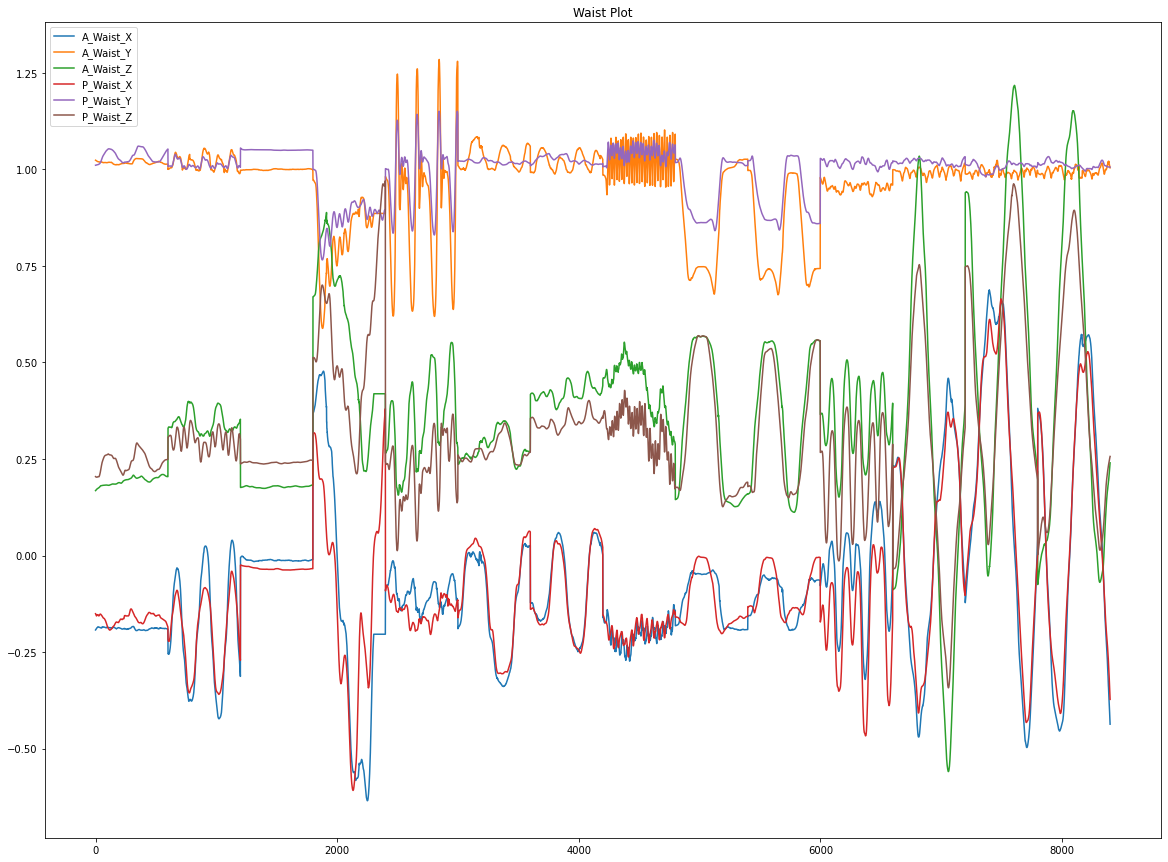

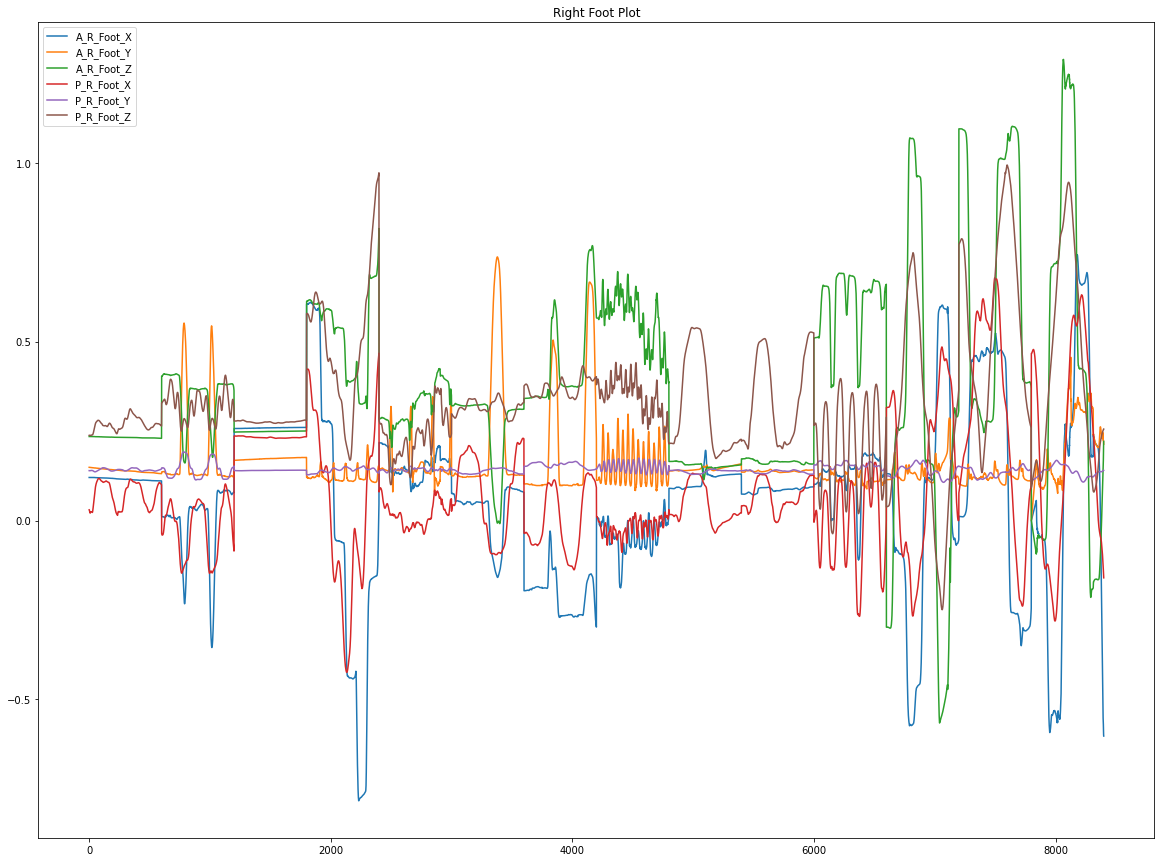

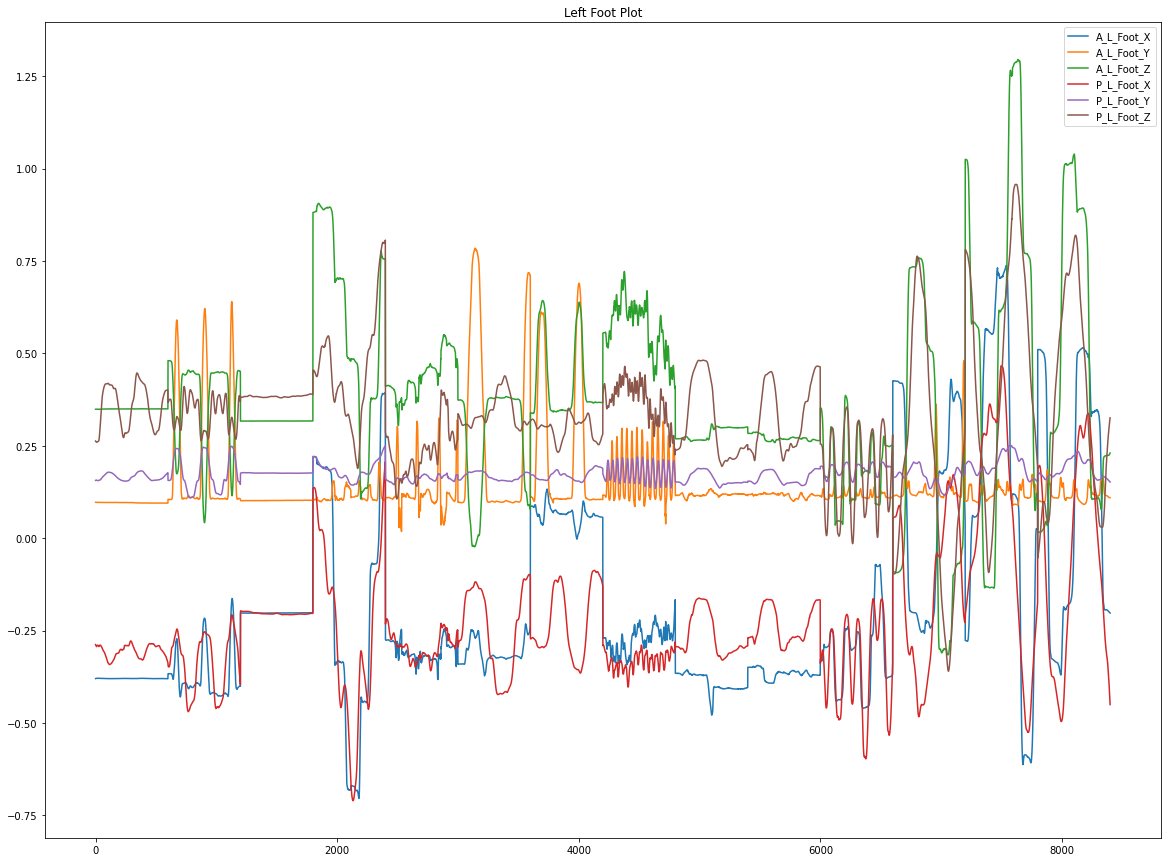

In [4]:
PlotPredictedData()
